# Prediction Diabetes

## Import Libraries

In [2]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support

# do ploting inline instead of in a separate window
%matplotlib inline

## Load and review data

In [3]:
df = pd.read_csv("./data/pima-data.csv")      # load Pima data.  Adjust path as necessary

In [4]:
df.shape

(768, 10)

In [5]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features 

From the metadata on the data source we have the following definition of the features.

| Feature  | Description | Comments |
|--------------|-------------|--------|
| num_preg     | number of pregnancies         |
| glucose_conc | Plasma glucose concentration a 2 hours in an oral glucose tolerance test         |
| diastolic_bp | Diastolic blood pressure (mm Hg) |
| thickness | Triceps skin fold thickness (mm) |
|insulin | 2-Hour serum insulin (mu U/ml) |
| bmi |  Body mass index (weight in kg/(height in m)^2) |
| diab_pred |  Diabetes pedigree function |
| Age (years) | Age (years)|
| skin | ???? | What is this? |
| diabetes | Class variable (1=True, 0=False) |  Why is our data boolean (True/False)? |


## Handle null values

*Pandas makes it easy to see if there are any null values in the data frame.*
*The isnull() method will check each value in the data frame for null values,  and then .any() will return if any nulls are found.*

In [8]:
df.isnull().values.any()

False

In [9]:
def plot_corr(df, size=10):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

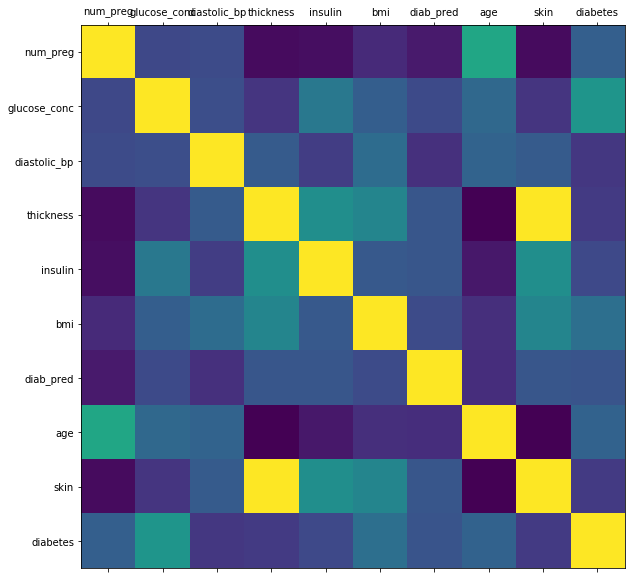

In [12]:
plot_corr(df)

In [13]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [14]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [15]:
del df['skin']

In [16]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


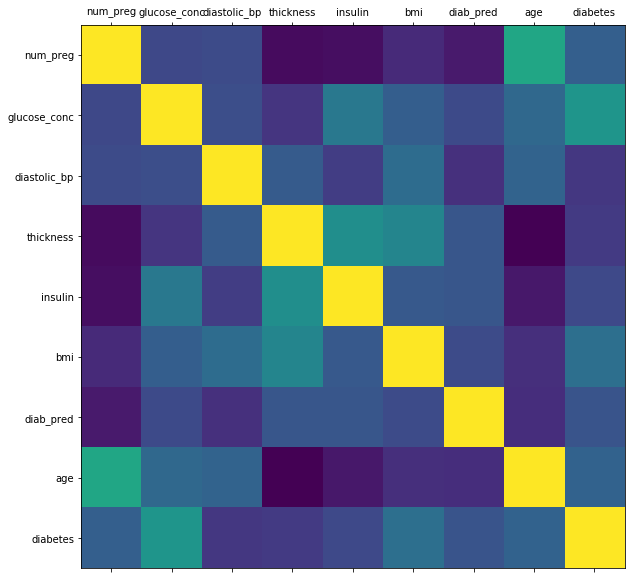

In [17]:
plot_corr(df)

## Check Data Types

In [18]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1, False to 0

In [19]:
diabetes_map = {True : 1, False : 0}

In [20]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [21]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check true/false ratio

In [22]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)
